Se extraen los frames de todos los videos:

In [29]:
import cv2
import os


# Carpeta con los videos a los que se les quiere extraer los frames
folder_path = 'videos'
filenames = [file for file in os.listdir(folder_path)]

for filename in filenames:
    filename = filename[:-4]
    print(filename)
    # Ruta del video
    video_path = (f"videos/{filename}.MOV") # Asume que el video está en una carpeta llamada videos

    # Extraer el nombre del archivo sin la extensión para usar como nombre de la carpeta
    video_name = os.path.splitext(os.path.basename(video_path))[0]

    # Crear una carpeta con el nombre del video si no existe
    output_folder = os.path.join("frames", video_name) # Guardarlos en carpeta llamada frames
    if not os.path.exists(output_folder):
        try:
            os.makedirs(output_folder)
        except OSError:
            print("Error: Creating directory of data")
            exit(1)

    # Abrir el video
    cam = cv2.VideoCapture(video_path)

    # Inicializar el contador de frames
    currentframe = 0

    while True:
        # Leer un frame del video
        ret, frame = cam.read()

        if ret:
            # Si hay frames disponibles, continuar creando imágenes
            name = os.path.join(output_folder, f"frame{currentframe}.jpg")
            # print(f"Creating... {name}")

            # Guardar la imagen extraída
            cv2.imwrite(name, frame)

            # Incrementar el contador de frames
            currentframe += 1
        else:
            print('Extracted all frames')
            break

    # Liberar todos los recursos y cerrar ventanas una vez terminado
    cam.release()
    cv2.destroyAllWindows()

formahault_200924_00_21_prisma_DSC_0100
Extracted all frames
altair_190924_20_24_prisma_DSC_0064
Extracted all frames
altair_190924_21_28_prisma_DSC_0080


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5f3f5829ae00] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5f3f59e7fc00] moov atom not found


Extracted all frames
altair_190924_20_29_mascara_DSC_0065
Extracted all frames
altair_190924_21_33_mascara_DSC_0081
Extracted all frames
altair_190924_23_42_mascara_DSC_0097
Extracted all frames
formahault_200924_00_24_mascara_DSC_0101
Extracted all frames
altair_190924_23_07_mascara_DSC_0093


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5f3f5c07d340] moov atom not found
[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5f3f576c6140] moov atom not found


Extracted all frames
altair_190924_19_28_mascara_DSC_0050
Extracted all frames
altair_190924_19_22_prisma_DSC_0049
Extracted all frames
altair_190924_23_38_prisma_DSC_0096
Extracted all frames
altair_190924_23_14_prisma_DSC_0094


[mov,mp4,m4a,3gp,3g2,mj2 @ 0x5f3f58163340] moov atom not found


Extracted all frames


## Frames Analysis

Aquí se determina la distancia entre los spot de las estrellas del método 1 y el método 2. 

Insertar la ruta donde se guardaron los frames

Definición de las funciones para analizar los videos:

In [3]:
"""________________Distance_IMG______________
Programa que construye el histograma de frecuencias de la separación 
entre dos "spots" (objetos) en el DIMM."""

"""_________________Libraries________________________"""
import cv2
import glob
import numpy as np
from scipy.stats import norm
from scipy.spatial import distance as dist
from astropy.stats import  mad_std
import matplotlib.pyplot as plt
import re
import matplotlib.image as mpimg

"""__________________________________________________"""


"""__________________FUNCTIONS_______________________"""
# Definir una función con parámetros de Open CV
def identify_stars_and_distance(image_path, plot=False):
    # Cargar imagen con filtro en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calcular la desviación estándar (ruido de fondo) de la imagen
    std, median = mad_std(image), np.median(image)

    imagef = image.flatten()
    # Datos de la imagen sin los pixs menores a 5 (fondo presuntamente)
    image_nob = imagef[np.where(imagef>5)]
    
    # Calcular la desviación estándar (ruido de fondo) de la imagen sin el fondo
    std, median = mad_std(image_nob), np.median(image_nob)

    # Aplicar un umbral para binarizar la imagen y destacar los objetos (estrellas) Este parámetro se puede variar según la intensidad de la estrella
    _, thresh = cv2.threshold(image, median + std, 255, cv2.THRESH_BINARY)

    # Encontrar los contornos de los objetos (estrellas)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    # cv2.drawContours(image, contours, -1, (0, 255, 0), 2)
    # # Show the result
    # cv2.imshow('Contours', image)

    # Filtrar unicamente los dos contornos más grandes detectados (asumiendo que son las estrellas)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]
    
    # Obtener los centros de las dos estrellas
    star_centers = []  #crear un vector para guardar los centros
    for contour in contours:
        M = cv2.moments(contour) #calcula los momentos del contorno, función de Open CV
        if M["m00"] != 0:  # moo es el area del contorno
            cX = int(M["m10"] / M["m00"])  #m10 es el momento espacial para calcular las coordenadas del centroide
            cY = int(M["m01"] / M["m00"])  #m01 es el momento espacial para calcular las coordenadas del centroide
            star_centers.append((cX, cY)) #guardar las coordenadas de los centros encontrados


    # Calcular la distancia entre las dos estrellas
    if len(star_centers) == 2:
        pixel_distance = dist.euclidean(star_centers[0], star_centers[1])

        if plot:
            # Load the image
            img = mpimg.imread(image_path)
            # Display the image
            plt.imshow(img)
            # print(star_centers)
            plt.plot([star_centers[0][0], star_centers[1][0]], [star_centers[0][1], star_centers[1][1]], 'ro', mfc='none')
            plt.tight_layout()
            plt.axis('off')
            # plt.savefig('hm.png', dpi=400)
            plt.show()

        return(pixel_distance)
    else:
        # print("No se encontraron estrellas.")
        return 0

    # Mostrar la imagen con los centros de las estrellas marcados
    #plt.imshow(image, cmap='gray')
    #plt.title(f"Distancia en pixeles: {pixel_distance:.2f}")
    #plt.show()
    

# Definir una funcion para extraer el numero del frame dek nombre del archivo
def extract_frame_number(filename):
    match = re.search(r'frame(\d+)\.jpg', filename)
    return int(match.group(1)) if match else -1

### DESENFOQUE Y REGISTRO DEL MOVIMIENTO DIFERENCIAL (revisar ecuaciones se deja para análisis de cada grupo)

Revisar estas ecuaciones en las presentaciones de clase, para un solo sigma, de acuerdo a lo conversado en clase

$$
\sigma (l)^2 = 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.097/d_{sep}^{1/3}]r_0(l)^{-5/3}
$$

$$
\sigma (t)^2 = 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.145/d_{sep}^{1/3}]r_0(t)^{-5/3}
$$

Despejando  $r_0$
$$
r_0(l)^{-5/3} = \sigma (l)^2 / {( 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.097/d_{sep}^{1/3}])}
$$

$$
r_0(t)^{-5/3} = \sigma (l)^2 / {( 2\lambda^2[0.179/D_{Hole}^{1/3} - 0.145/d_{sep}^{1/3}])}
$$

In [8]:
Dhole = 5  #diametro de la apertura  en cm
dsep =  12 #diametro de la separacion de las aperturas en cm

lamb = 0.5 #longitud de onda en micrometros (um)

r_l =  (std**2 / (2*lamb**2*((0.179/Dhole**(1/3))-(0.097/dsep**(1/3)))))**(-3/5)
r_t =  (std**2 / (2*lamb**2*((0.179/Dhole**(1/3))-(0.145/dsep**(1/3)))))**(-3/5)
print (f"El valor para el parametro de Fried (l) es: {r_l:.3f}")
print (f"El valor para el parametro de Fried (t) es: {r_t:.3f}")


El valor para el parametro de Fried (l) es: 0.242
El valor para el parametro de Fried (t) es: 0.189


Seeing :
$$
\Delta \theta = 0.98 \lambda / r_0
$$

In [9]:
FWHM_l = 0.98*lamb/r_l
FWHM_t = 0.98 * lamb / r_t
print (f"El valor del Seeing (l) es: {FWHM_l:.3f}")
print (f"El valor del Seeing (t) es: {FWHM_t:.3f}")

El valor del Seeing (l) es: 2.025
El valor del Seeing (t) es: 2.590


## Correr sobre todos los videos:

### All:

G_3_Altair_290824_22_25_DSC0026_Prisma

 Su carpeta tiene 8775 archivos .jpg 

          ....            

Se procesarán los frames del:3510 al:7020

          ....            
No. 1: /frame3510.jpg
          ....            
No. 7020: /frame7020.jpg
          ....            
          ....            

 :: CONSTRUYENDO EL HISTOGRAMA :: 

          ....            


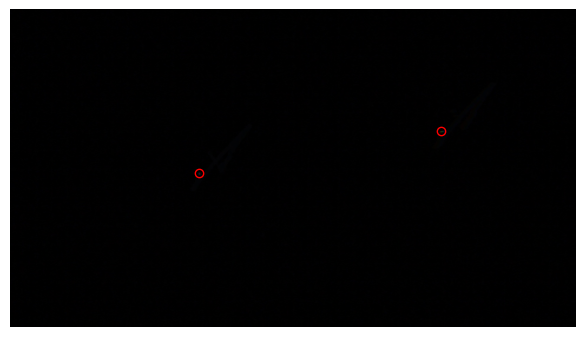

No se encontraron estrellas en 191 frames, es decir en el 5.44% de ellos
Media (mu): 298.521, Desviación estándar (sigma): 0.423


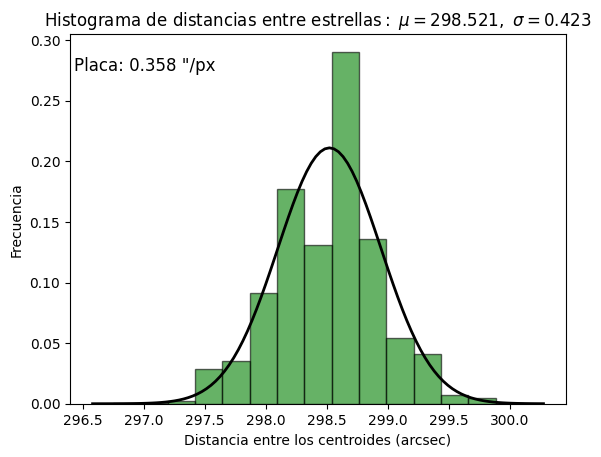

El valor para el parametro de Fried (l) es: 0.350
El valor para el parametro de Fried (t) es: 0.274
El valor del Seeing (l) es: 1.398
El valor del Seeing (t) es: 1.789
--------------------------------------------------
G_3_Altair_290824_22_30_DSC0028_Mascara

 Su carpeta tiene 8511 archivos .jpg 

          ....            

Se procesarán los frames del:3404 al:6808

          ....            
No. 1: /frame3404.jpg
          ....            
No. 6808: /frame6808.jpg
          ....            
          ....            

 :: CONSTRUYENDO EL HISTOGRAMA :: 

          ....            


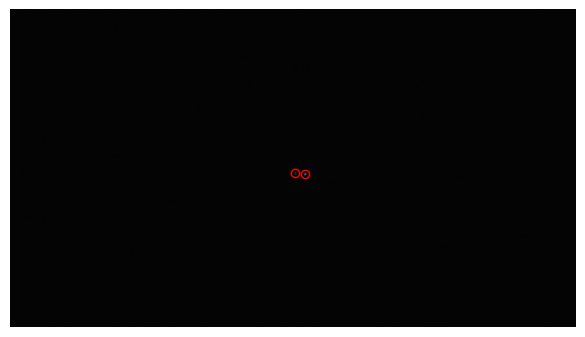

KeyboardInterrupt: 

In [27]:
folder = 'frames' # Carpeta con los frames de cada video (frames en carpetas con el nombre del video)
files = np.sort([file for file in os.listdir(folder)])

# Constantes para el cálculo del seeing
Dhole = 5  # diametro de la apertura  en cm
dsep =  12 # diametro de la separacion de las aperturas en cm
lamb = 0.5 # longitud de onda en micrometros (um)

values = np.zeros((len(files),6), dtype=object)
ff = -1

for filename in files:
    ff+=1
    print(filename)

    """__________________________________________________"""


    """_____________________SCALE________________________"""
    scale_size = 0.358  # segundos de arco por px ('' /px)

    """__________________________________________________"""


    # filename = 'G_3_Altair_290824_22_30_DSC0028_Mascara'


    """_____________________MAIN_________________________"""
    # Abrir carpeta donde se encuentran los frames del video
    carpeta = f"{folder}/{filename}"


    # Busqueda de los archivos .jpg
    archivos = glob.glob(carpeta + r"/*.jpg")

    # Ordenar los archivos numéricamente por el número de frame en el nombre asi (0, 1, 2, 3, ...)
    archivos.sort(key=extract_frame_number)

    # Definir los frames que se procesaran, se escogieron unicamente los frames entre el 40% y el 80% para eliminar errores al inicio y fin
    start = int(len(archivos)*0.40)
    end = int(len(archivos)*0.80)

    nombres = []
    for j in archivos:
        if carpeta in j:
            nombres.append(j.replace(carpeta, ""))


    if nombres != []:
        l = len(nombres)
        print(f"\n Su carpeta tiene {l} archivos .jpg \n")
        print(f"          ....            ")
        print(f"\nSe procesarán los frames del:{start} al:{end}\n")
        print(f"          ....            ")
        print(f"No. 1: {nombres[start]}")
        print(f"          ....            ")
        print(f"No. {end}: {nombres[end]}")
        print(f"          ....            ")
        print(f"          ....            ")
        print("\n :: CONSTRUYENDO EL HISTOGRAMA :: \n")
        print(f"          ....            ")
    else:
        print("\n Su carpeta no tiene archivos .jpg \n")

    distances = []

    plotit = True
    for k in range(start, end):
        # Usar la función en un frame
        # identify_stars_and_distance(archivos[k])
        #print(f"archivo {archivos[k]}") #verificar si se están ejecutando los frames en orden
        dis = identify_stars_and_distance(archivos[k], plotit)*scale_size

        distances.append(dis)
        if dis!=0:
            plotit=False

    distances = np.array(distances)
    tot_frames = len(distances)
    no_stars = len(np.where(distances==0)[0])
    print(f'No se encontraron estrellas en {no_stars} frames, es decir en el {round(no_stars/(end-start+1)*100,2)}% de ellos')

    # Guardar las distancias en un archivo llamado nombre_del_video.dat dentro de carpeta data
    np.savetxt(f"data/{filename}.dat", distances, fmt="%.6f", header="Distancias entre estrellas (arcsec)")

    distances = np.loadtxt(f'data/{filename}.dat')
    distances = distances[np.where(distances!=0)]

    # Ajuste de los datos a una distribución normal
    mu, std = norm.fit(distances)
    # Normalizar los valores del histograma
    weights = np.ones_like(distances) / len(distances)
    # Graficar el histograma con las distancias
    count, bins, ignored = plt.hist(distances, weights=weights, bins=15, alpha=0.6, color="g", edgecolor="black")

    # Graficar la función de densidad de probabilidad (PDF) ajustada
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    # Normalizar la PDF para que se ajuste al histograma
    bin_width = bins[1] - bins[0]
    p_normalized = p * bin_width  # Ajuste el área de la PDF al histograma
    plt.plot(x, p_normalized, "k", linewidth=2)


    # Mostrar los valores de mu y sigma
    print(f"Media (mu): {mu:.3f}, Desviación estándar (sigma): {std:.3f}")


    # Grafico
    plt.title(r"$\mathrm{Histograma\ de\ distancias\ entre\ estrellas:}\ \mu=%.3f,\ \sigma=%.3f$" % (mu, std))
    plt.xlabel("Distancia entre los centroides (arcsec)")
    plt.ylabel("Frecuencia")
    plt.text(0.15, 0.9, f"Placa: {scale_size} \"/px", transform=plt.gca().transAxes, fontsize=12, color='black', ha='center')
    plt.show()

    
    r_l =  (std**2 / (2*lamb**2*((0.179/Dhole**(1/3))-(0.097/dsep**(1/3)))))**(-3/5)
    r_t =  (std**2 / (2*lamb**2*((0.179/Dhole**(1/3))-(0.145/dsep**(1/3)))))**(-3/5)
    print (f"El valor para el parametro de Fried (l) es: {r_l:.3f}")
    print (f"El valor para el parametro de Fried (t) es: {r_t:.3f}")

    FWHM_l = 0.98*lamb/r_l
    FWHM_t = 0.98 * lamb / r_t
    print (f"El valor del Seeing (l) es: {FWHM_l:.3f}")
    print (f"El valor del Seeing (t) es: {FWHM_t:.3f}")
    print('-'*50)

    # Nombre del video, fracción en donde NO se encontraron estrellas, rl, rf, FWWHM_l, FWWHM_t
    values[ff] = [filename, no_stars/tot_frames if tot_frames!=0 else np.nan, r_l, r_t, FWHM_l, FWHM_t]


# Guardar los datos de todos los videos en un array
np.save('data.npy', values, allow_pickle=True)

In [44]:
# np.savetxt('names.csv', values[:,0].astype(str), delimiter=',', fmt='%s')
# names = np.genfromtxt('names.csv', delimiter=',', dtype=None, encoding='utf-8')
# values[:,0] = names
# values[:,0]

array(['G_3_Altair_290824_22_25_DSC0026_Prisma',
       'G_3_Altair_290824_22_30_DSC0028_Mascara',
       'G_3_Altair_290824_22_35_DSC0027_Mascara',
       'G_3_Altair_300824_21_38_DSC0034_Mascara',
       'G_3_Altair_300824_21_43_DSC0035_Mascara',
       'G_3_Altair_300824_21_47_DSC0037_Prisma',
       'G_3_Zeta_Alquilae_300824_21_05_DSC0029_Prisma',
       'G_3_Zeta_Alquilae_300824_21_10_DSC0030_Prisma',
       'G_3_Zeta_Alquilae_300824_21_15_DSC0031_Prisma',
       'G_3_Zeta_Alquilae_300824_21_20_DSC0032_Mascara',
       'G_3_Zeta_Alquilae_300824_21_25_DSC0033_Mascara',
       'G_3_Altair_190924_19_22_DSC0049_Prisma',
       'G_3_Altair_190924_19_28_DSC0050_Mascara',
       'G_3_Altair_190924_20_24_DSC0064_Prisma',
       'G_3_Altair_190924_20_29_DSC0065_Mascara',
       'G_3_Altair_190924_21_28_DSC0080_Prisma',
       'G_3_Altair_190924_21_33_DSC0081_Mascara',
       'G_3_Altair_190924_23_07_DSC0093_Mascara',
       'G_3_Altair_190924_23_14_DSC0094_Prisma',
       'G_3_Altair_19092

Se toman datos de las fechas de las observaciones:

In [6]:
from datetime import datetime

# values = np.array([value for value in values if value[1]<.2])

data_strings = values[:,0]

dates = np.zeros((len(data_strings),2), dtype=object)
info = np.zeros((len(data_strings),2), dtype=object)

i=-1
for data_str in data_strings:
    i+=1
    parts = data_str.split('_')
    date_str = '300824' if int(parts[-4]) < 24 else '310824'
    if int(parts[-4]) == 24:
        parts[-4] = '00'
    time_str = parts[-4] + ':' + parts[-3]
    date_obj = datetime.strptime(date_str + ' ' + time_str, '%d%m%y %H:%M')
    dates[i,0] = date_obj
    dates[i,1] = parts[-5]
    info[i] = [parts[2], parts[-1]]

In [7]:
dates

array([[datetime.datetime(2024, 8, 30, 22, 25), '290824'],
       [datetime.datetime(2024, 8, 30, 22, 30), '290824'],
       [datetime.datetime(2024, 8, 30, 22, 35), '290824'],
       [datetime.datetime(2024, 8, 30, 21, 38), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 43), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 47), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 5), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 10), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 15), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 20), '300824'],
       [datetime.datetime(2024, 8, 30, 21, 25), '300824'],
       [datetime.datetime(2024, 8, 30, 19, 22), '190924'],
       [datetime.datetime(2024, 8, 30, 19, 28), '190924'],
       [datetime.datetime(2024, 8, 30, 20, 24), '190924'],
       [datetime.datetime(2024, 8, 30, 20, 29), '190924'],
       [datetime.datetime(2024, 8, 30, 21, 28), '190924'],
       [datetime.datetime(2024, 8, 30, 21, 33), '190924']

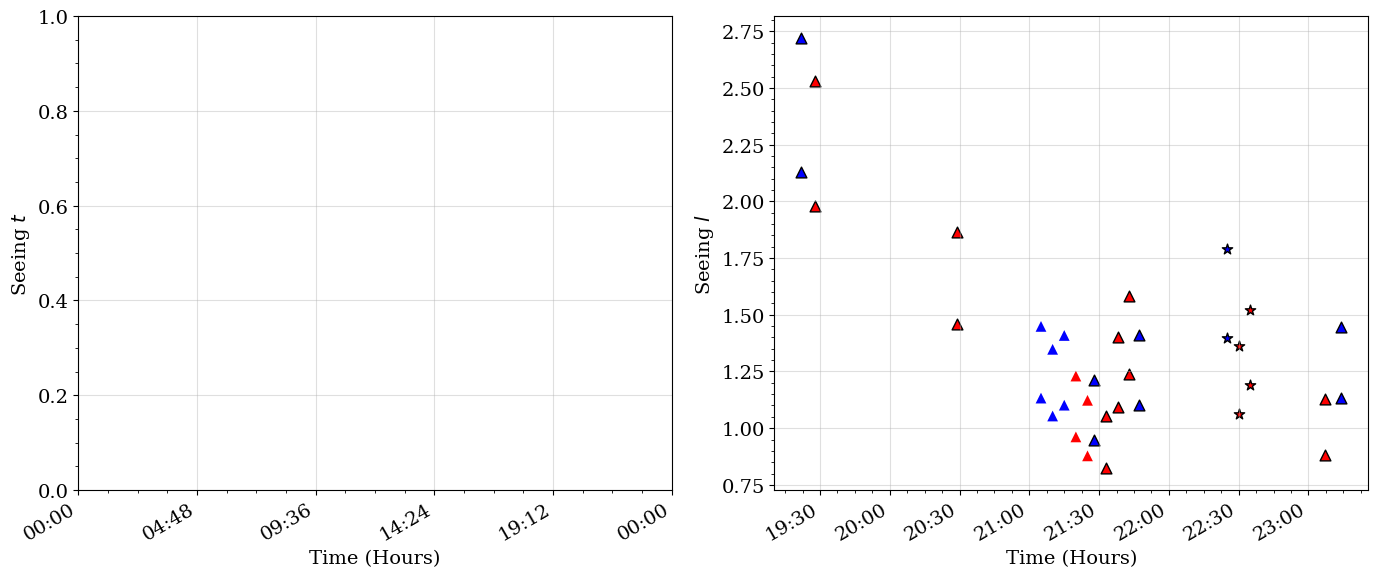

In [9]:
import matplotlib.dates as mdates
# plt.figure(figsize=(10, 6))

cols = ['r', 'b']
see = ['l', 't']

fig, ax = plt.subplots(1,2, figsize=(14,6))


for s in range(1,3):
    i=-1
    for value in values:
        i+=1
        # print(dates[i,0], value[-s])
        plt.scatter(dates[i,0], value[-s], c='r' if info[i,1]=='Mascara' else 'b',
                        marker='*' if dates[i,1]=='290824' else '^', edgecolors='k' if info[i,0]=='Altair' else 'none', s=60)

    # Add labels and title
    ax[s-1].set_xlabel('Time (Hours)')
    ax[s-1].set_ylabel(f'Seeing ${see[-s]}$')
    ax[s-1].minorticks_on()
    ax[s-1].grid(alpha=.4)


    # Format the x-axis for hours and minutes
    ax[s-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    # plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))

    # Rotate time labels
plt.gcf().autofmt_xdate()

plt.tight_layout()
# plt.savefig('seeing_less_than0.2.png', dpi=400)
# plt.suptitle('30-08-24')
plt.show()

In [10]:
not_nans = ~np.isnan( values[:,-4:-2][:,0].astype(float) )

mean_fried = np.mean( values[:,2:4], axis=1)
mean_seeing = np.mean( values[:,-2:], axis=1)
mean_all = np.mean( values[:,2:], axis=1)
print( mean_fried, mean_seeing, mean_all )

[np.float64(0.3121832989663318) np.float64(0.4103055854511757)
 np.float64(0.36725128190431966) np.float64(0.3985335480962676)
 np.float64(0.3525891757635066) np.float64(0.39620464984326886)
 np.float64(0.3854148213650582) np.float64(0.4143178415791286)
 np.float64(0.396352291179343) np.float64(0.45403822093425916)
 np.float64(0.49729366087702986) np.float64(0.20510297412101058)
 np.float64(0.2206471219332069) np.float64(nan)
 np.float64(0.2993912615229038) np.float64(0.4612542554376995)
 np.float64(0.5308505935853826) np.float64(0.4953652751429652)
 np.float64(0.3858642160804612) np.float64(nan) np.float64(nan)
 np.float64(nan) np.float64(nan)] [np.float64(1.5934784792333145) np.float64(1.2124070110620138)
 np.float64(1.3545422248750998) np.float64(1.2482195560579168)
 np.float64(1.410869654185218) np.float64(1.2555566136735004)
 np.float64(1.290706378952995) np.float64(1.2006660552751083)
 np.float64(1.2550889184940228) np.float64(1.0956288381522339)
 np.float64(1.0003291970414243) n

In [11]:
nans = ~np.isnan((mean_seeing*1).astype(float))
# print((mean_seeing*s).astype(float)[nans])

# print(values[:,0][nans])
a = np.array([(mean_seeing*1).astype(float), values[:,0] ])#.reshape((len(values),2))
# for i in range( a.shape[1] ):
#     print(a[0,i], a[0,i])

a = a.T

for i in range(len(a)):
    print(a[i,1],': ', round(a[i,0],3))


cenit = [5.246, 4.020, 4.530, 3.942, 4.470, 3.990, 4.153, 3.879, 4.073, 3.574, 3.279, 7.658, 7.101, np.nan, 5.282, 3.710, 3.258, 4.970, 6.166, np.nan, np.nan, np.nan, np.nan]

G_3_Altair_290824_22_25_DSC0026_Prisma :  1.593
G_3_Altair_290824_22_30_DSC0028_Mascara :  1.212
G_3_Altair_290824_22_35_DSC0027_Mascara :  1.355
G_3_Altair_300824_21_38_DSC0034_Mascara :  1.248
G_3_Altair_300824_21_43_DSC0035_Mascara :  1.411
G_3_Altair_300824_21_47_DSC0037_Prisma :  1.256
G_3_Zeta_Alquilae_300824_21_05_DSC0029_Prisma :  1.291
G_3_Zeta_Alquilae_300824_21_10_DSC0030_Prisma :  1.201
G_3_Zeta_Alquilae_300824_21_15_DSC0031_Prisma :  1.255
G_3_Zeta_Alquilae_300824_21_20_DSC0032_Mascara :  1.096
G_3_Zeta_Alquilae_300824_21_25_DSC0033_Mascara :  1.0
G_3_Altair_190924_19_22_DSC0049_Prisma :  2.425
G_3_Altair_190924_19_28_DSC0050_Mascara :  2.255
G_3_Altair_190924_20_24_DSC0064_Prisma :  nan
G_3_Altair_190924_20_29_DSC0065_Mascara :  1.662
G_3_Altair_190924_21_28_DSC0080_Prisma :  1.078
G_3_Altair_190924_21_33_DSC0081_Mascara :  0.937
G_3_Altair_190924_23_07_DSC0093_Mascara :  1.004
G_3_Altair_190924_23_14_DSC0094_Prisma :  1.289
G_3_Altair_190924_23_38_DSC0096_Prisma :  nan
G

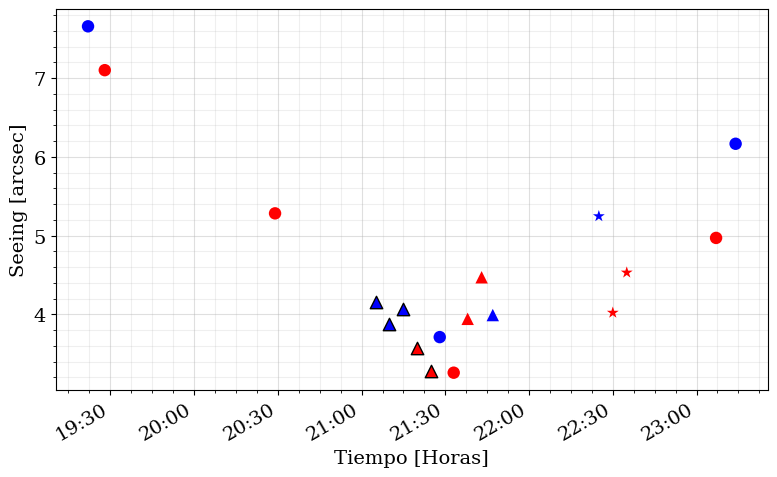

In [13]:
import matplotlib.dates as mdates
# plt.figure(figsize=(10, 6))

cols = ['r', 'b']
see = ['l', 't']

fig, ax = plt.subplots(1,1, figsize=(8,5))


i=-1
for value in values:
    i+=1
    # print(dates[i,0], value[-s])
    if dates[i,1]=='290824': marker='*'
    elif dates[i,1]=='300824': marker='^'
    else: marker='o'
    plt.scatter(dates[i,0], cenit[i], c='r' if info[i,1]=='Mascara' else 'b',
                    marker=marker, edgecolors='none' if info[i,0]=='Altair' else 'k', s=80)

# Add labels and title
plt.xlabel('Tiempo [Horas]')
plt.ylabel('Seeing [arcsec]')
plt.minorticks_on()
plt.grid(alpha=.4, which='major')
plt.grid(alpha=.2, which='minor')

# Format the x-axis for hours and minutes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=4))
plt.gca().set_axisbelow(True)
# Rotate time labels
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.savefig('seeing_cenit.png', dpi=400)
plt.savefig('seeing_cenit.pdf')
# plt.suptitle('30-08-24')
plt.show()

In [54]:
# 0.36330343585970787

mean_fried = np.mean( values[:,2:4][not_nans] )
mean_fried

np.float64(0.3879422263212955)